#**Assignment 05 -Artificial Neural Networks**

**Bob has started his own mobile company. He wants to give tough fight to big companies
like Apple, Samsung etc. He does not know how to estimate price of mobiles his company
creates. In this competitive mobile phone market, you cannot simply assume things. To
solve this problem, he collects sales data of mobile phones of various companies. Bob
wants to find out some relation between features of a mobile phone (eg:- RAM, Internal
Memory etc) and its selling price. But he is not so good at Machine Learning. Create an
artificial neural network-based classifier to help Bob. Data and class labels are available
in mobile_price_classification.csv file. Use price_range column as label and remaining
columns as data.
Also do the hyperparmeter tuning.**

**EXPLORATORY DATA ANALYSIS**

In [75]:
#Importing neccessary libraries
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [76]:
#importing dataset
mobile_price_data=pd.read_csv('/content/mobile_price_classification.csv')
mobile_price_data

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [77]:
#display shape of the data
mobile_price_data.shape

(2000, 21)

In [78]:
#display columns of the dataset
mobile_price_data.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_cam',
       '4G', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'primary_camera',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [79]:
#general information about the dataset
mobile_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [80]:
#Statistical information about the dataset
mobile_price_data.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [81]:
#printing unique 'price_range' values
print(np.unique(mobile_price_data['price_range']))

[0 1 2 3]


**PREPROCESSING**

In [82]:
#Check any missing values in the dataset
mobile_price_data.isnull().sum()

,0
battery_power,0
bluetooth,0
clock_speed,0
dual_sim,0
front_cam,0
4G,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


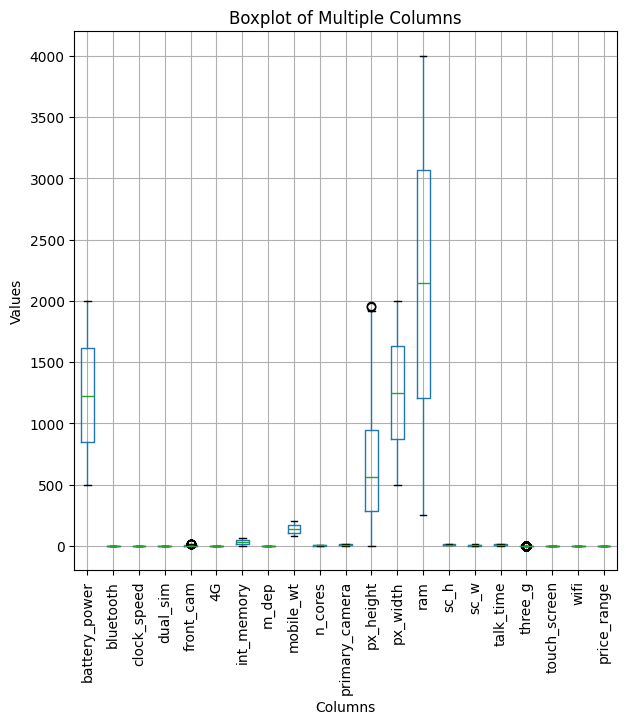

In [83]:
# Create boxplot to check outliers are present in the dataset
#create boxplot
plt.figure(figsize=(7, 7))
mobile_price_data.boxplot()
plt.title('Boxplot of Multiple Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'front_cam')

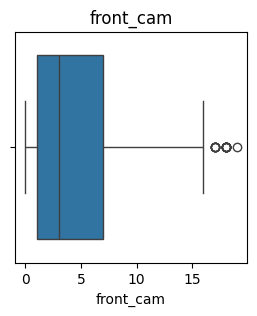

In [84]:
#   Boxplot of the 'front_cam' before outlier treatment.
plt.figure(figsize=(3,3))
sns.boxplot(x=mobile_price_data['front_cam'],data=mobile_price_data)
plt.title('front_cam')

Text(0.5, 1.0, 'px_height')

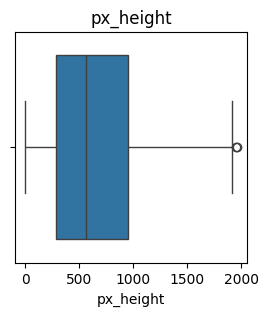

In [85]:
#   Boxplot of the 'px_height' before outlier treatment.
plt.figure(figsize=(3,3))
sns.boxplot(x=mobile_price_data['px_height'],data=mobile_price_data)
plt.title('px_height')

Text(0.5, 1.0, 'three_g')

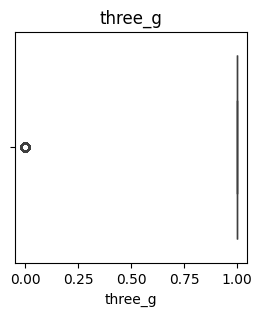

In [86]:
#   Boxplot of the 'three_g' before outlier treatment.
plt.figure(figsize=(3,3))
sns.boxplot(x=mobile_price_data['three_g'],data=mobile_price_data)
plt.title('three_g')

In [87]:
# Columns to apply the IQR method to
numeric_columns = ['front_cam','px_height','three_g']

# Applying the IQR method to each specified column
for column in numeric_columns:
    Q1 = mobile_price_data[column].quantile(0.25)
    Q3 = mobile_price_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mobile_price_data[column] = np.where(mobile_price_data[column] < lower_bound, lower_bound, mobile_price_data[column])
    mobile_price_data[column] = np.where(mobile_price_data[column] > upper_bound, upper_bound, mobile_price_data[column])

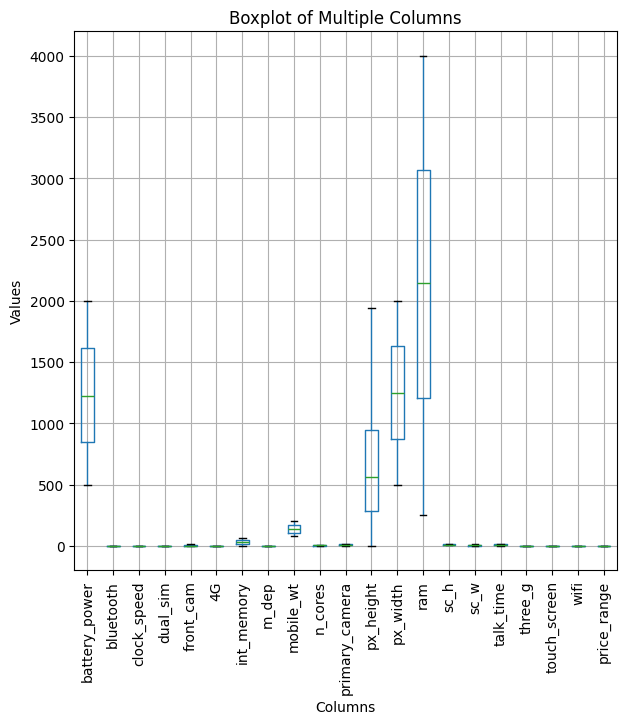

In [88]:
# Create boxplot to after checking outliers ar
#create boxplot
plt.figure(figsize=(7, 7))
mobile_price_data.boxplot()
plt.title('Boxplot of Multiple Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

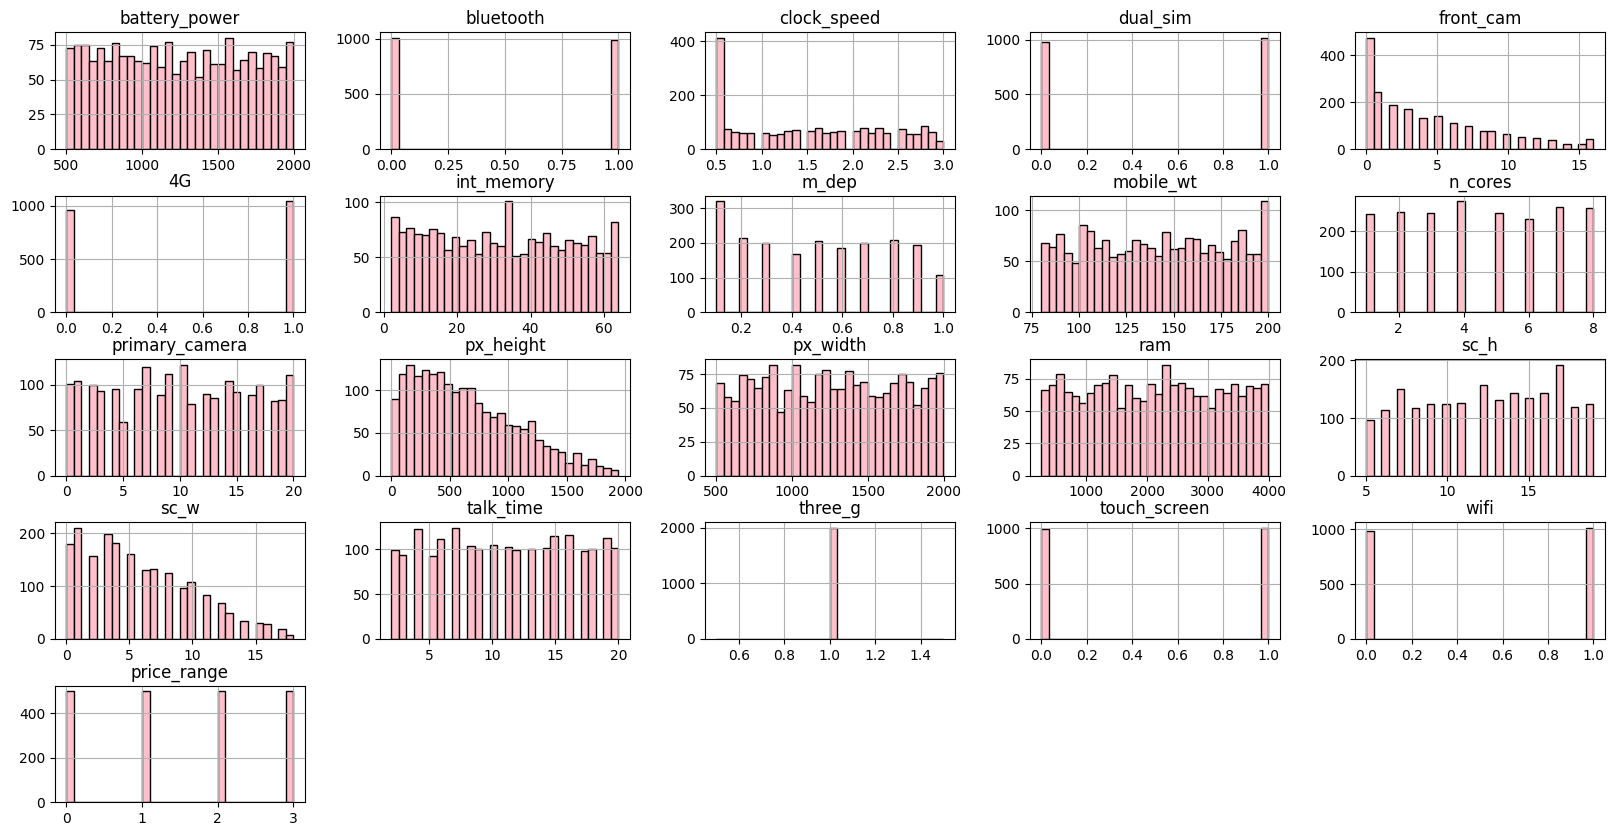

In [89]:
#ploting histograms of all numerical column
mobile_price_data.hist(figsize=(20,10),bins=30, color='pink', edgecolor='black')
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

In [90]:
# Separate features and target
X,y=mobile_price_data.values[:,:-1],mobile_price_data.values[:,-1]

In [91]:
#Taking shape of the X and Y
print(X.shape,y.shape)

(2000, 20) (2000,)


In [92]:
#y is a 1D array of labels.so reshape y
y = y.reshape(-1,1)
y

array([[1.],
       [2.],
       [2.],
       ...,
       [3.],
       [0.],
       [3.]])

In [93]:
#after reshaping get 2D column vector
print(y.shape)

(2000, 1)


In [94]:
# now convert y labels to one hot encoder
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()
y = one_hot.fit_transform(y)

In [95]:
y = y.toarray()

In [96]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [97]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**MODEL DEVELOPMENT**

In [98]:
#determine the number of features
n_features=X_train.shape[1]

#define the model
model=Sequential()
model.add(Dense(8,input_shape=(n_features,),activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [99]:
#display summary of the model
model.summary()

Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_168 (Dense)               │ (None, 8)              │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_169 (Dense)               │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_170 (Dense)               │ (None, 4)              │            28 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 250 (1000.00 B)

 Trainable params: 250 (1000.00 B)

 Non-trainable params: 0 (0.00 B)

In [100]:
#compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [101]:
#fit the model
history=model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_split=0.2,
    batch_size=64,
    verbose=1
)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.2111 - loss: 1.5884 - val_accuracy: 0.2094 - val_loss: 1.5494
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2290 - loss: 1.5144 - val_accuracy: 0.2094 - val_loss: 1.4877
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2379 - loss: 1.4481 - val_accuracy: 0.2250 - val_loss: 1.4490
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2573 - loss: 1.4099 - val_accuracy: 0.2344 - val_loss: 1.4216
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2530 - loss: 1.3930 - val_accuracy: 0.2469 - val_loss: 1.3997
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2750 - loss: 1.3694 - val_accuracy: 0.2531 - val_loss: 1.3833
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3059 - loss: 1.3503 - val_accuracy: 0.2750 - val_loss: 1.3683
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2959 - loss: 1.3485 - val_accuracy: 0.278

In [102]:
#Evaluate the model
loss,acc=model.evaluate(X_test,y_test)
print('Test Accuracy:%3f'%acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9367 - loss: 0.1637  
Test Accuracy:0.937500


In [103]:
y_pred = model.predict(X_test)

#Then do the inverse one hot encoding
pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

#inverse encoding for y_test labels

test = []
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [104]:
# accuracy of the model
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred,test)
print("Accuracy of Your Model is = " + str(acc*100))

Accuracy of Your Model is = 93.75


#**We achieved a test accuracy of 93.75%**

In [105]:
X_test[0]

array([ 0.92755239, -0.9900495 ,  1.19851653, -1.01918398, -0.30128432,
        0.95788598, -0.38842571,  0.34073951,  1.68831994, -1.10197128,
       -0.81092912, -0.97849275,  0.82502108, -1.32620097, -1.0223894 ,
        0.05349793, -0.0020137 ,  0.        ,  0.99401789, -1.01409939])

In [106]:
#predict
sample=[0.92755239, -0.9900495 ,  1.19851653, -1.01918398, -0.30128432,
        0.95788598, -0.38842571,  0.34073951,  1.68831994, -1.10197128,
       -0.81092912, -0.97849275,  0.82502108, -1.32620097, -1.0223894 ,
        0.05349793, -0.0020137 ,  0.        ,  0.99401789, -1.01409939]
y_pred=model.predict(np.array([sample]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[9.8692733e-01, 1.3072193e-02, 4.5574180e-07, 1.3815472e-11]],
      dtype=float32)

**VISUALIZATION**

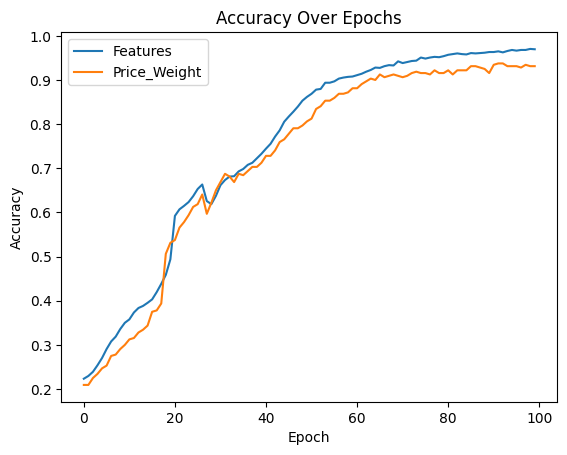

In [107]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Features','Price_Weight'],loc='upper left')

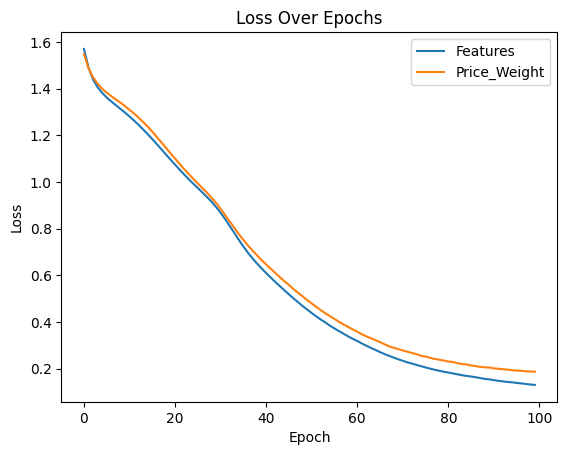

In [108]:
# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Features','Price_Weight'],loc='upper right')
plt.show()

#**HYPERPARAMETER TUNING**

In [109]:
#determine the number of features
n_features=X_train.shape[1]
def build_and_train_model(optimizer, learning_rate, epochs):
    model = Sequential()
    model.add(Dense(8,input_shape=(n_features,),activation='relu'))
    model.add(Dense(6,activation='relu'))
    model.add(Dense(4,activation='softmax'))

    # Apply learning rate to optimizer
    if isinstance(optimizer, Adam):
        opt = Adam(learning_rate=learning_rate)
    elif isinstance(optimizer, SGD):
        opt = SGD(learning_rate=learning_rate)
    elif isinstance(optimizer, RMSprop):
        opt = RMSprop(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=64, verbose=0)
    return history, model

# Hyperparameter grid
learning_rates = [0.0001, 0.001, 0.01]
epoch_values = [10, 30, 50]
optimizers = {
    "Adam": Adam(),
    "SGD": SGD(),
    "RMSprop": RMSprop()
}

# Tracking best
best_val_accuracy = 0
best_config = {}
best_model = None

# Iterate through all combinations
for opt_name, opt in optimizers.items():
    for lr in learning_rates:
        for ep in epoch_values:
            print(f"Training with Optimizer={opt_name}, LR={lr}, Epochs={ep}")
            history, model = build_and_train_model(opt, lr, ep)
            val_acc = max(history.history['val_accuracy'])

            print(f" -> Max Validation Accuracy: {val_acc:.4f}")

            if val_acc > best_val_accuracy:
              best_val_accuracy = val_acc
              best_config = {
                  "optimizer": opt_name,
                  "learning_rate": lr,
                  "epochs": ep
              }
            best_model = model
            best_history = history

# Print best result
print("\n Best Model Configuration:")
print(f"Optimizer       : {best_config['optimizer']}")
print(f"Learning Rate   : {best_config['learning_rate']}")
print(f"Epochs          : {best_config['epochs']}")
print(f"Best Val Accuracy: {best_val_accuracy:.4f}")

Training with Optimizer=Adam, LR=0.0001, Epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 -> Max Validation Accuracy: 0.2656
Training with Optimizer=Adam, LR=0.0001, Epochs=30
 -> Max Validation Accuracy: 0.2969
Training with Optimizer=Adam, LR=0.0001, Epochs=50
 -> Max Validation Accuracy: 0.2719
Training with Optimizer=Adam, LR=0.001, Epochs=10
 -> Max Validation Accuracy: 0.4750
Training with Optimizer=Adam, LR=0.001, Epochs=30
 -> Max Validation Accuracy: 0.6375
Training with Optimizer=Adam, LR=0.001, Epochs=50
 -> Max Validation Accuracy: 0.8719
Training with Optimizer=Adam, LR=0.01, Epochs=10
 -> Max Validation Accuracy: 0.9250
Training with Optimizer=Adam, LR=0.01, Epochs=30
 -> Max Validation Accuracy: 0.9281
Training with Optimizer=Adam, LR=0.01, Epochs=50
 -> Max Validation Accuracy: 0.9563
Training with Optimizer=SGD, LR=0.0001, Epochs=10
 -> Max Validation Accuracy: 0.2656
Training with Optimizer=SGD, LR=0.0001, Epochs=30
 -> Max Validation Accuracy: 0.3000
Training with Optimizer=SGD, LR=0.0001, Epochs=50
 -> Max Validation Accuracy: 0.2656
Training with Optim

In [110]:
# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)

# Print test accuracy
print(f"Test Accuracy on Best Model: {test_accuracy*100:.4f}")


Test Accuracy on Best Model: 95.0000


#**After hyperparameter tuning, we achieved a test accuracy of 95%**

**VISUALIZATION AFTER HYPERPARAMETER TUNING**

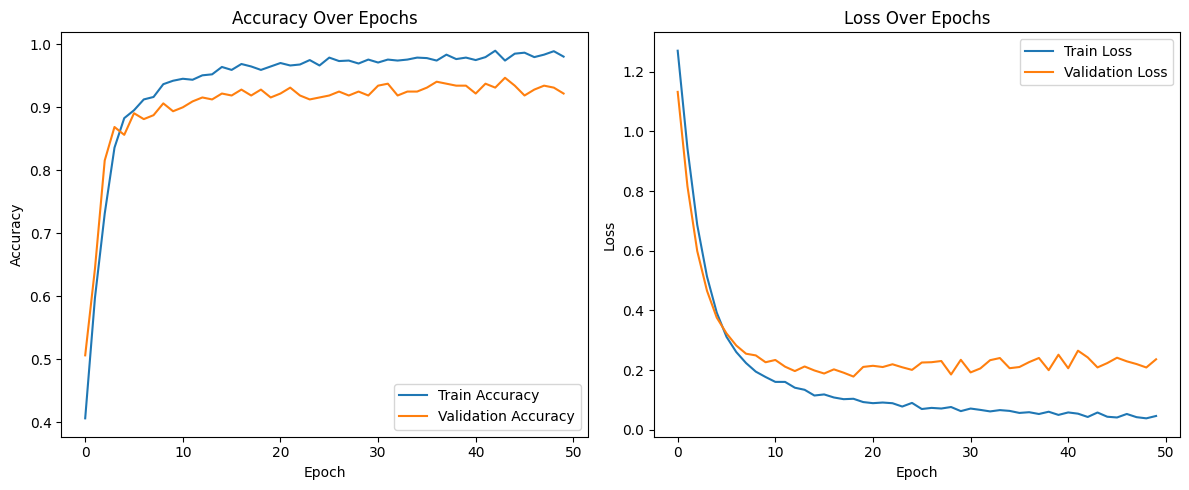

In [111]:
# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(best_history.history['accuracy'], label='Train Accuracy')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(best_history.history['loss'], label='Train Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()